<a href="https://colab.research.google.com/github/Shobhit-2510/Flare-2025-Task-5/blob/main/Flare_2025_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Load Data

In [1]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/Summer 2025/Dataset" /content/Dataset

## Unzip zipped files

In [2]:
# Clinical
!unzip "/content/Dataset/Training/Clinical/neojaundice/imagesTr.zip" -d "/content/Dataset/Training/Clinical/neojaundice/"
# Dermatology
!unzip "/content/Dataset/Training/Dermatology/bcn20000/imagesTr.zip" -d "/content/Dataset/Training/Dermatology/bcn20000/"
# Endoscopy
!unzip "/content/Dataset/Training/Endoscopy/endo/imagesTr.zip" -d "/content/Dataset/Training/Endoscopy/endo/"
# Mammography
!unzip "/content/Dataset/Training/Mammography/CMMD/imagesTr.zip" -d "/content/Dataset/Training/Mammography/CMMD/"
# Microscopy / Chromosome
!unzip "/content/Dataset/Training/Microscopy/chromosome/imagesTr.zip" -d "/content/Dataset/Training/Microscopy/chromosome/"
# Retinography / retino
!unzip "/content/Dataset/Training/Retinography/retino/imagesTr.zip" -d "/content/Dataset/Training/Retinography/retino/"
# Ultrasound / iugc
!unzip "/content/Dataset/Training/Ultrasound/iugc/imagesTr.zip" -d "/content/Dataset/Training/Ultrasound/iugc/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_01156.png  
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_01175.png  
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_01176.png  
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_01177.png  
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_01179.png  
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_01181.png  
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_01184.png  
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_01194.png  
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_01197.png  
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_01205.png  
  inflating: /content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_0120

In [22]:
!rm -rf "/content/Dataset/Training/Clinical/neojaundice/imagesTr.zip"
!rm -rf "/content/Dataset/Training/Dermatology/bcn20000/imagesTr.zip"
!rm -rf "/content/Dataset/Training/Endoscopy/endo/imagesTr.zip"
!rm -rf "/content/Dataset/Training/Mammography/CMMD/imagesTr.zip"
!rm -rf "/content/Dataset/Training/Microscopy/chromosome/imagesTr.zip"
!rm -rf "/content/Dataset/Training/Retinography/retino/imagesTr.zip"
!rm -rf "/content/Dataset/Training/Ultrasound/iugc/imagesTr.zip"

## Convert .json to .csv

Importing Dependencies

In [4]:
import json
import csv

### Clinical / neojaundice

In [5]:
# converting .json into list of dict
with open("/content/Dataset/Training/Clinical/neojaundice/neojaundice_questions_train.json") as f:
  neojaundice_list = json.load(f)
type(neojaundice_list)

list

In [52]:
rows = [["ImageName","Jaundice"]]
for i in range(len(neojaundice_list)):
  for image in neojaundice_list[i]["ImageName"]:
    rows.append([image,'No' if neojaundice_list[i]["Answer"] == 'A' else 'Yes'])
print(rows[1:10])

[['imagesTr/NeoJaundice_01263-1.jpg', 'No'], ['imagesTr/NeoJaundice_01263-2.jpg', 'No'], ['imagesTr/NeoJaundice_01263-3.jpg', 'No'], ['imagesTr/NeoJaundice_00214-1.jpg', 'No'], ['imagesTr/NeoJaundice_00214-2.jpg', 'No'], ['imagesTr/NeoJaundice_00214-3.jpg', 'No'], ['imagesTr/NeoJaundice_00046-1.jpg', 'Yes'], ['imagesTr/NeoJaundice_00046-2.jpg', 'Yes'], ['imagesTr/NeoJaundice_00046-3.jpg', 'Yes']]


In [7]:
# w -> overwrite file
with open("/content/Dataset/Training/Clinical/neojaundice/neojaundice.csv",'w') as f:
  for row in rows:
    f.write(",".join(row)+"\n")

In [8]:
!head "/content/Dataset/Training/Clinical/neojaundice/neojaundice.csv"

ImageName,Jaundice
imagesTr/NeoJaundice_01263-1.jpg,No
imagesTr/NeoJaundice_01263-2.jpg,No
imagesTr/NeoJaundice_01263-3.jpg,No
imagesTr/NeoJaundice_00214-1.jpg,No
imagesTr/NeoJaundice_00214-2.jpg,No
imagesTr/NeoJaundice_00214-3.jpg,No
imagesTr/NeoJaundice_00046-1.jpg,Yes
imagesTr/NeoJaundice_00046-2.jpg,Yes
imagesTr/NeoJaundice_00046-3.jpg,Yes


### Dermatology / bcn20000

In this dataset we have to find disease from given image.

In [9]:
# converting .json into list of dict
with open("/content/Dataset/Training/Dermatology/bcn20000/bcn20000_questions_train.json") as f:
  bcn_list = json.load(f)
type(bcn_list)

list

A. Actinic Keratosis, B. Basal Cell Carcinoma, C. Benign Keratosis-like Lesions, D. Dermatofibroma, E. Melanoma, F. Nevus, G. Squamous Cell Carcinoma, H. Vascular Lesions

In [10]:
rows = [["ImageName","Disease"]]
for i in range(len(bcn_list)):
  if isinstance(bcn_list[i]["ImageName"], list):
    for image in bcn_list[i]["ImageName"]:
      rows.append([image,bcn_list[i]["Answer"]])
  else:
    rows.append([bcn_list[i]["ImageName"],bcn_list[i]["Answer"]])
print(rows)

[['ImageName', 'Disease'], ['imagesTr/BCN20000_02782-1.jpg', 'B'], ['imagesTr/BCN20000_02782-2.jpg', 'B'], ['imagesTr/BCN20000_02782-3.jpg', 'B'], ['imagesTr/BCN20000_02782-4.jpg', 'B'], ['imagesTr/BCN20000_02782-5.jpg', 'B'], ['imagesTr/BCN20000_00990-1.jpg', 'B'], ['imagesTr/BCN20000_00990-2.jpg', 'B'], ['imagesTr/BCN20000_00270-1.jpg', 'F'], ['imagesTr/BCN20000_00270-2.jpg', 'F'], ['imagesTr/BCN20000_00270-3.jpg', 'F'], ['imagesTr/BCN20000_00270-4.jpg', 'F'], ['imagesTr/BCN20000_01895-1.jpg', 'F'], ['imagesTr/BCN20000_01895-2.jpg', 'F'], ['imagesTr/BCN20000_02895-1.jpg', 'E'], ['imagesTr/BCN20000_02895-2.jpg', 'E'], ['imagesTr/BCN20000_01670-1.jpg', 'C'], ['imagesTr/BCN20000_01670-2.jpg', 'C'], ['imagesTr/BCN20000_01670-3.jpg', 'C'], ['imagesTr/BCN20000_01670-4.jpg', 'C'], ['imagesTr/BCN20000_01670-5.jpg', 'C'], ['imagesTr/BCN20000_01670-6.jpg', 'C'], ['imagesTr/BCN20000_01670-7.jpg', 'C'], ['imagesTr/BCN20000_03032-1.jpg', 'B'], ['imagesTr/BCN20000_03032-2.jpg', 'B'], ['imagesTr/BC

In [11]:
# w -> overwrite file
with open("/content/Dataset/Training/Dermatology/bcn20000/bcn20000.csv",'w') as f:
  for row in rows:
    f.write(",".join(row)+"\n")

In [12]:
!head "/content/Dataset/Training/Dermatology/bcn20000/bcn20000.csv"

ImageName,Disease
imagesTr/BCN20000_02782-1.jpg,B
imagesTr/BCN20000_02782-2.jpg,B
imagesTr/BCN20000_02782-3.jpg,B
imagesTr/BCN20000_02782-4.jpg,B
imagesTr/BCN20000_02782-5.jpg,B
imagesTr/BCN20000_00990-1.jpg,B
imagesTr/BCN20000_00990-2.jpg,B
imagesTr/BCN20000_00270-1.jpg,F
imagesTr/BCN20000_00270-2.jpg,F


### Mammography / CMMD

In this dataset we need to find abnormality from the given image.

In [48]:
# converting .json into list of dict
with open("/content/Dataset/Training/Mammography/CMMD/CMMD_all_train.json") as f:
  cmmd_list = json.load(f)
type(cmmd_list)

list

In [49]:
rows1 = [["ImageName","Mass/Calcification"]]
rows2 = [["ImageName","Benign/Malignant"]]
dict3 = {"ImageName":"Luminal A/Luminal B/HER2-enriched/Triple negative"}

end = 0
for i in range(len(cmmd_list)):
  if(cmmd_list[i]["Answer"]=="Benign" or cmmd_list[i]["Answer"]=="Malignant"):
    break
  for image in cmmd_list[i]["ImageName"]:
    rows1.append([image,cmmd_list[i]["Answer"]])
  end = i
print(rows1)

for i in range(end + 1,len(cmmd_list)):
  if(cmmd_list[i]["Answer"]=="Benign" or cmmd_list[i]["Answer"]=="Malignant"):
    for image in cmmd_list[i]["ImageName"]:
      rows2.append([image,cmmd_list[i]["Answer"]])
  else:
    for image in cmmd_list[i]["ImageName"]:
      dict3[image] = cmmd_list[i]["Answer"]

print(rows2)
print(dict3)
print(len(rows1))
print(len(rows2))
print(len(dict3))

[['ImageName', 'Mass/Calcification'], ['imagesTr/CMMD_D1-0001-1.png', 'Calcification'], ['imagesTr/CMMD_D1-0001-2.png', 'Calcification'], ['imagesTr/CMMD_D1-0003-1.png', 'Calcification'], ['imagesTr/CMMD_D1-0003-2.png', 'Calcification'], ['imagesTr/CMMD_D1-0004-1.png', 'Calcification'], ['imagesTr/CMMD_D1-0004-2.png', 'Calcification'], ['imagesTr/CMMD_D1-0005-1.png', 'Calcification'], ['imagesTr/CMMD_D1-0005-2.png', 'Calcification'], ['imagesTr/CMMD_D1-0007-1.png', 'Calcification'], ['imagesTr/CMMD_D1-0007-2.png', 'Calcification'], ['imagesTr/CMMD_D1-0008-1.png', 'Calcification'], ['imagesTr/CMMD_D1-0008-2.png', 'Calcification'], ['imagesTr/CMMD_D1-0009-1.png', 'Calcification'], ['imagesTr/CMMD_D1-0009-2.png', 'Calcification'], ['imagesTr/CMMD_D1-0011-1.png', 'Calcification'], ['imagesTr/CMMD_D1-0011-2.png', 'Calcification'], ['imagesTr/CMMD_D1-0012-1.png', 'Calcification'], ['imagesTr/CMMD_D1-0012-2.png', 'Calcification'], ['imagesTr/CMMD_D1-0014-1.png', 'Calcification'], ['imagesTr/C

In [50]:
merged_rows = rows1
for i in range(len(merged_rows)):
  merged_rows[i].append(rows2[i][1])
  if merged_rows[i][0] in dict3:
    merged_rows[i].append(dict3[merged_rows[i][0]])
  else:
    merged_rows[i].append("")
print(merged_rows)
print(len(merged_rows))

[['ImageName', 'Mass/Calcification', 'Benign/Malignant', 'Luminal A/Luminal B/HER2-enriched/Triple negative'], ['imagesTr/CMMD_D1-0001-1.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0001-2.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0003-1.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0003-2.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0004-1.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0004-2.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0005-1.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0005-2.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0007-1.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0007-2.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0008-1.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0008-2.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0009-1.png', 'Calcification', 'Benign', ''], ['imagesTr/CMMD_D1-0009-2.png', 'Calcification', 'Benign'

In [51]:
# w -> overwrite file
with open("/content/Dataset/Training/Mammography/CMMD/CMMD.csv",'w') as f:
  for row in merged_rows:
    f.write(",".join(row)+"\n")

# Microscopy / Chromosome - Data Visualisation

In [13]:
import matplotlib.pyplot as plt

In [14]:
import json

In [15]:
with open("/content/Dataset/Training/Microscopy/chromosome/chromosome_questions_train.json",'r') as f:
  data = json.load(f)

In [16]:
print(data[0]["Answer"])
print(type(data[0]["Answer"]))

{"1": [[916, 361, 80, 35], [844, 640, 48, 74]], "2": [[966, 402, 52, 70], [663, 360, 73, 53]], "3": [[742, 355, 51, 62], [884, 665, 50, 63]], "4": [[774, 682, 63, 38], [970, 579, 62, 49]], "5": [[744, 642, 58, 34], [867, 430, 42, 59]], "6": [[969, 625, 45, 58], [782, 441, 40, 55]], "7": [[702, 550, 32, 53], [726, 460, 55, 34]], "8": [[821, 488, 36, 52], [654, 495, 45, 46]], "9": [[847, 390, 32, 60], [592, 306, 42, 50]], "10": [[697, 323, 45, 42], [847, 746, 47, 42]], "11": [[688, 280, 46, 34], [782, 572, 35, 49]], "12": [[651, 543, 47, 37], [793, 727, 40, 50]], "13": [[736, 421, 34, 42], [744, 741, 49, 32]], "14": [[595, 575, 42, 34], [920, 398, 31, 41]], "15": [[469, 522, 35, 42], [628, 352, 33, 38]], "16": [[453, 458, 32, 30], [930, 670, 34, 37]], "17": [[839, 349, 34, 30], [627, 595, 32, 36]], "18": [[510, 479, 34, 34], [912, 629, 35, 33]], "19": [[989, 684, 26, 25], [509, 364, 29, 27]], "20": [[813, 660, 29, 30], [659, 590, 33, 29]], "21": [[436, 489, 24, 28], [628, 541, 28, 26]], 

In [17]:
# string to dict using json
dict_data = json.loads(data[0]["Answer"])
print(dict_data)
print(type(dict_data))

{'1': [[916, 361, 80, 35], [844, 640, 48, 74]], '2': [[966, 402, 52, 70], [663, 360, 73, 53]], '3': [[742, 355, 51, 62], [884, 665, 50, 63]], '4': [[774, 682, 63, 38], [970, 579, 62, 49]], '5': [[744, 642, 58, 34], [867, 430, 42, 59]], '6': [[969, 625, 45, 58], [782, 441, 40, 55]], '7': [[702, 550, 32, 53], [726, 460, 55, 34]], '8': [[821, 488, 36, 52], [654, 495, 45, 46]], '9': [[847, 390, 32, 60], [592, 306, 42, 50]], '10': [[697, 323, 45, 42], [847, 746, 47, 42]], '11': [[688, 280, 46, 34], [782, 572, 35, 49]], '12': [[651, 543, 47, 37], [793, 727, 40, 50]], '13': [[736, 421, 34, 42], [744, 741, 49, 32]], '14': [[595, 575, 42, 34], [920, 398, 31, 41]], '15': [[469, 522, 35, 42], [628, 352, 33, 38]], '16': [[453, 458, 32, 30], [930, 670, 34, 37]], '17': [[839, 349, 34, 30], [627, 595, 32, 36]], '18': [[510, 479, 34, 34], [912, 629, 35, 33]], '19': [[989, 684, 26, 25], [509, 364, 29, 27]], '20': [[813, 660, 29, 30], [659, 590, 33, 29]], '21': [[436, 489, 24, 28], [628, 541, 28, 26]], 

In [18]:
x1 = dict_data["1"][0][0]
y1= dict_data["1"][0][1]
x2 = dict_data["1"][1][0]
y2 = dict_data["1"][1][1]
print(x1,y1,x2,y2)

916 361 844 640


In [19]:
X1 = []
Y1 = []
X2 = []
Y2 = []

for i in range(len(dict_data)-1):
  X1.append(dict_data[str(i+1)][0][0])
  Y1.append(dict_data[str(i+1)][0][1])
  X2.append(dict_data[str(i+1)][1][0])
  Y2.append(dict_data[str(i+1)][1][1])

In [20]:
print(X1)
print(Y1)
print(X2)
print(Y2)

[916, 966, 742, 774, 744, 969, 702, 821, 847, 697, 688, 651, 736, 595, 469, 453, 839, 510, 989, 813, 436, 497]
[361, 402, 355, 682, 642, 625, 550, 488, 390, 323, 280, 543, 421, 575, 522, 458, 349, 479, 684, 660, 489, 451]
[844, 663, 884, 970, 867, 782, 726, 654, 592, 847, 782, 793, 744, 920, 628, 930, 627, 912, 509, 659, 628, 762]
[640, 360, 665, 579, 430, 441, 460, 495, 306, 746, 572, 727, 741, 398, 352, 670, 595, 629, 364, 590, 541, 495]


(1024, 1280, 3)


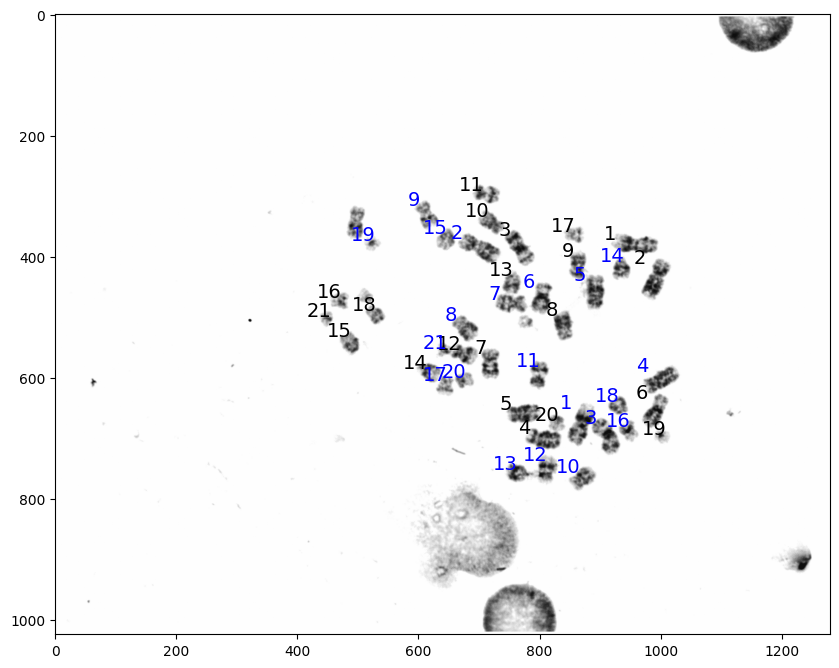

In [21]:
img = plt.imread("/content/Dataset/Training/Microscopy/chromosome/imagesTr/Chrm_00001.png")
print(img.shape)

plt.figure(figsize=(10,10))
plt.imshow(img)

values = []
for i in range(21):
  values.append(i+1)

# plt.scatter(X1, Y1, color='red')
for i, val in enumerate(values):
    plt.text(X1[i], Y1[i], str(val), fontsize=14, ha='center', va='center', color='black')

# plt.scatter(X2, Y2, color='green')
for i, val in enumerate(values):
    plt.text(X2[i], Y2[i], str(val), fontsize=14, ha='center', va='center', color='blue')
plt.show()